In [6]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from xgboost import XGBClassifier
import xgboost as xgb  
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.model_selection import GridSearchCV  
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, fbeta_score, classification_report  


In [7]:
file_dir="./data"
sym=0
dates = list(range(156))
data_frames = []
count=0
for date in dates:
    if date%2==0:
        file_name=f"snapshot_sym{sym}_date{date//2}_am.csv"
    else:
        file_name=f"snapshot_sym{sym}_date{date//2}_pm.csv"
    try:
        data_frames.append(pd.read_csv(os.path.join(file_dir, file_name)))
    except FileNotFoundError:
        pass

df = pd.concat(data_frames)


In [8]:
df

,date,time,sym,n_close,amount_delta,n_midprice,n_bid1,n_bsize1,n_bid2,n_bsize2,...,n_asize3,n_ask4,n_asize4,n_ask5,n_asize5,label_5,label_10,label_20,label_40,label_60
0,0,09:40:03,0,0.015691,2594895.0,0.015270,0.015130,1.961524e-06,0.014850,9.973850e-07,...,0.000010,0.016251,0.000005,0.016531,0.000016,1.0,0.0,0.0,0.0,0.0
1,0,09:40:06,0,0.015410,837314.0,0.015410,0.015130,3.424355e-06,0.014850,1.030631e-06,...,0.000005,0.016531,0.000016,0.016811,0.000018,0.0,0.0,0.0,0.0,0.0
2,0,09:40:09,0,0.015130,184807.0,0.015270,0.015130,3.158386e-06,0.014850,9.807620e-07,...,0.000011,0.016251,0.000005,0.016531,0.000017,1.0,0.0,0.0,0.0,0.0
3,0,09:40:12,0,0.015691,500046.0,0.015551,0.015410,4.155771e-07,0.015130,2.044639e-06,...,0.000005,0.016531,0.000016,0.016811,0.000018,0.0,0.0,0.0,0.0,0.0
4,0,09:40:15,0,0.014290,1785635.0,0.014710,0.014290,9.308927e-06,0.014010,4.986925e-08,...,0.000036,0.015971,0.000009,0.016251,0.000005,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,77,14:49:45,0,0.016020,204975.0,0.016109,0.016020,4.503193e-07,0.015842,3.504146e-07,...,0.000001,0.016732,0.000004,0.016910,0.000002,1.0,1.0,1.0,1.0,1.0
1995,77,14:49:48,0,0.016020,371032.0,0.016109,0.016020,6.497964e-07,0.015842,3.504146e-07,...,0.000002,0.016732,0.000003,0.016910,0.000002,1.0,1.0,1.0,1.0,2.0
1996,77,14:49:51,0,0.016020,611282.0,0.015931,0.015842,4.501531e-07,0.015664,3.058647e-06,...,0.000008,0.016554,0.000002,0.016732,0.000003,1.0,1.0,1.0,1.0,2.0
1997,77,14:49:54,0,0.016020,225302.0,0.015931,0.015842,4.257172e-07,0.015664,3.923048e-06,...,0.000008,0.016554,0.000001,0.016732,0.000002,1.0,1.0,1.0,1.0,2.0


In [9]:
df.fillna(method='ffill', inplace=True)  

/var/folders/_w/b7g0m0j10_j91zldh8jp4njh0000gn/T/ipykernel_37379/1494983228.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
feature_col_names =['n_bid1', 'n_bid2', 'n_bid3', 'n_bid4', 'n_bid5',\
                    'n_ask1', 'n_ask2', 'n_ask3', 'n_ask4', 'n_ask5',\
                    'n_asize1', 'n_asize2', 'n_asize3', 'n_asize4', 'n_asize5',\
                    'n_bsize1', 'n_bsize2', 'n_bsize3', 'n_bsize4', 'n_bsize5',\
                    'amount_delta', 'n_midprice']
label_col_name = ['label_60']

In [11]:
train_sample_nums = 20000
train_data = np.ascontiguousarray(df[feature_col_names][:train_sample_nums].values)
train_label = df[label_col_name][:train_sample_nums].values.reshape(-1)

test_data = np.ascontiguousarray(df[feature_col_names][train_sample_nums:40000].values)
test_label = df[label_col_name][train_sample_nums:40000].values.reshape(-1)

In [12]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  
model.fit(train_data, train_label)  

/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:27:30] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [13]:
y_hat = model.predict(test_data)
y=test_label

print("总体正确率：", sum(y_hat == y) / len(y_hat))  
index = y != 1  
print("上涨下跌召回率：", sum(y_hat[index] == y[index]) / sum(index))  
index = y_hat != 1  
print("上涨下跌准确率：", sum(y_hat[index] == y[index]) / sum(index))

总体正确率： 0.51725
上涨下跌召回率： 0.13288456743954127
上涨下跌准确率： 0.2109220419469727


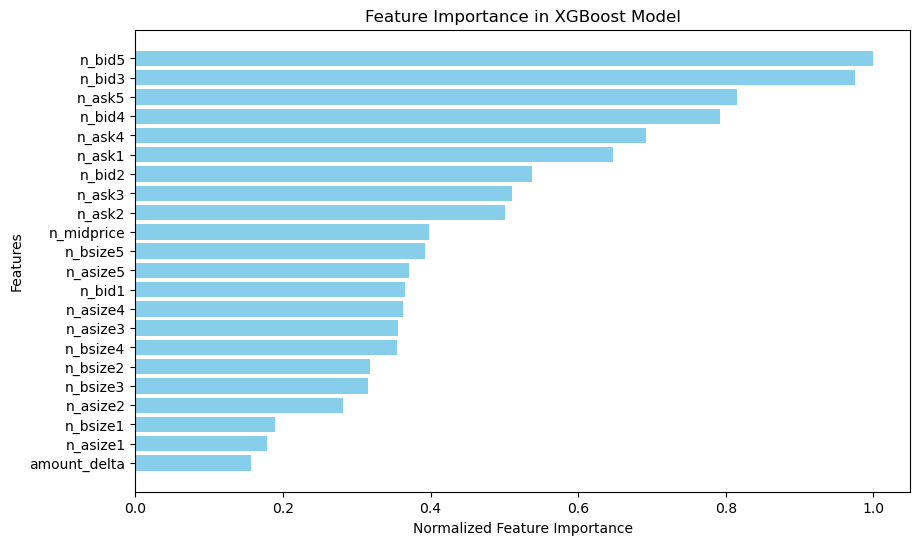

In [14]:
importance = model.feature_importances_  
importance_normalized = importance / np.max(importance)  # 归一化处理  
# 将特征和重要性组合成 DataFrame 并排序  
importance_df = pd.DataFrame({  
    'Feature': feature_col_names,  
    'Importance': importance_normalized  
}).sort_values(by='Importance', ascending=False)  

# 可视化特征重要性（按大小排序）  
plt.figure(figsize=(10, 6))  
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')  
plt.xlabel('Normalized Feature Importance')  
plt.ylabel('Features')  
plt.title('Feature Importance in XGBoost Model')  
plt.gca().invert_yaxis()  # 反转 y 轴，使重要性最高的特征在顶部  
plt.show()  

In [128]:
# 复制原始数据  
new_df = df.copy()  

# 价格+1  
new_df['bid1'] = new_df['n_bid1'] + 1  
new_df['bid2'] = new_df['n_bid2'] + 1  
new_df['bid3'] = new_df['n_bid3'] + 1  
new_df['bid4'] = new_df['n_bid4'] + 1  
new_df['bid5'] = new_df['n_bid5'] + 1  

new_df['ask1'] = new_df['n_ask1'] + 1  
new_df['ask2'] = new_df['n_ask2'] + 1  
new_df['ask3'] = new_df['n_ask3'] + 1  
new_df['ask4'] = new_df['n_ask4'] + 1  
new_df['ask5'] = new_df['n_ask5'] + 1  

# 交易量取对数  
new_df['bsize1'] = new_df['n_bsize1'].map(np.log)  
new_df['bsize2'] = new_df['n_bsize2'].map(np.log)  
new_df['bsize3'] = new_df['n_bsize3'].map(np.log)  
new_df['bsize4'] = new_df['n_bsize4'].map(np.log)  
new_df['bsize5'] = new_df['n_bsize5'].map(np.log)  

new_df['asize1'] = new_df['n_asize1'].map(np.log)  
new_df['asize2'] = new_df['n_asize2'].map(np.log)  
new_df['asize3'] = new_df['n_asize3'].map(np.log)  
new_df['asize4'] = new_df['n_asize4'].map(np.log)  
new_df['asize5'] = new_df['n_asize5'].map(np.log)  

new_df['amount'] = new_df['amount_delta'].map(np.log1p)  

# 价格差  
new_df['spread1'] = new_df['ask1'] - new_df['bid1']  
new_df['spread2'] = new_df['ask2'] - new_df['bid2']  
new_df['spread3'] = new_df['ask3'] - new_df['bid3']  

new_df['mid_price1'] = (new_df['ask1'] + new_df['bid1']) / 2  
new_df['mid_price2'] = (new_df['ask2'] + new_df['bid2']) / 2  
new_df['mid_price3'] = (new_df['ask3'] + new_df['bid3']) / 2  

# 加权平均价格  
new_df['weighted_ab1'] = (new_df['ask1'] * new_df['n_asize1'] + new_df['bid1'] * new_df['n_bsize1']) / (new_df['n_asize1'] + new_df['n_bsize1'])  
new_df['weighted_ab2'] = (new_df['ask2'] * new_df['n_asize2'] + new_df['bid2'] * new_df['n_bsize2']) / (new_df['n_asize2'] + new_df['n_bsize2'])  
new_df['weighted_ab3'] = (new_df['ask3'] * new_df['n_asize3'] + new_df['bid3'] * new_df['n_bsize3']) / (new_df['n_asize3'] + new_df['n_bsize3'])  

new_df['relative_spread1'] = new_df['spread1'] / new_df['mid_price1']  
new_df['relative_spread2'] = new_df['spread2'] / new_df['mid_price2']  
new_df['relative_spread3'] = new_df['spread3'] / new_df['mid_price3']  

new_df['ask1_ma5'] = new_df['ask1'].rolling(window=5, min_periods=1).mean()  
new_df['ask1_ma10'] = new_df['ask1'].rolling(window=10, min_periods=1).mean()  
new_df['ask1_ma20'] = new_df['ask1'].rolling(window=20, min_periods=1).mean()  
new_df['ask1_ma40'] = new_df['ask1'].rolling(window=40, min_periods=1).mean()  
new_df['ask1_ma60'] = new_df['ask1'].rolling(window=60, min_periods=1).mean()  

new_df['bid1_ma5'] = new_df['bid1'].rolling(window=5, min_periods=1).mean()  
new_df['bid1_ma10'] = new_df['bid1'].rolling(window=10, min_periods=1).mean()  
new_df['bid1_ma20'] = new_df['bid1'].rolling(window=20, min_periods=1).mean()  
new_df['bid1_ma40'] = new_df['bid1'].rolling(window=40, min_periods=1).mean()  
new_df['bid1_ma60'] = new_df['bid1'].rolling(window=60, min_periods=1).mean()  

# 中间价变化趋势  
new_df['mid_price1_range5'] = new_df['mid_price1'] - new_df['mid_price1'].shift(5)  
new_df['mid_price1_range10'] = new_df['mid_price1'] - new_df['mid_price1'].shift(10)  
new_df['mid_price1_range20'] = new_df['mid_price1'] - new_df['mid_price1'].shift(20)  

# 一档/三档报单量占总报单量比值  
new_df['all_size'] = new_df['n_bsize1'] + new_df['n_bsize2'] + new_df['n_bsize3'] + new_df['n_bsize4'] + new_df['n_bsize5'] + \
                     new_df['n_asize1'] + new_df['n_asize2'] + new_df['n_asize3'] + new_df['n_asize4'] + new_df['n_asize5']  
new_df['bsize_asize_1'] = (new_df['n_bsize1'] + new_df['n_asize1']) / new_df['all_size']  
new_df['bsize_asize_3'] = (new_df['all_size'] - new_df['n_bsize4'] - new_df['n_bsize5'] - new_df['n_asize4'] - new_df['n_asize5']) / new_df['all_size']  

# 买卖报单量差与交易量结合  
new_df['bsize_over_asize'] = (new_df['n_bsize1'] + new_df['n_bsize2'] + new_df['n_bsize3'] + new_df['n_bsize4'] + new_df['n_bsize5'] -   
                              (new_df['n_asize1'] + new_df['n_asize2'] + new_df['n_asize3'] + new_df['n_asize4'] + new_df['n_asize5'])) / \
                             (new_df['n_bsize1'] + new_df['n_bsize2'] + new_df['n_bsize3'] + new_df['n_bsize4'] + new_df['n_bsize5'] +   
                              new_df['n_asize1'] + new_df['n_asize2'] + new_df['n_asize3'] + new_df['n_asize4'] + new_df['n_asize5'])  
new_df['amount_size'] = new_df['amount'] * new_df['bsize_over_asize']

# 计算 vol1_rel_diff  
new_df['vol1_rel_diff'] = (new_df['n_bsize1'] - new_df['n_asize1']) / \
                          (new_df['n_bsize1'] + new_df['n_asize1'])  
# 计算 volall_rel_diff  
new_df['volall_rel_diff'] = (  
    (new_df['n_bsize1'] + new_df['n_bsize2'] + new_df['n_bsize3'] + new_df['n_bsize4'] + new_df['n_bsize5'] -  
     new_df['n_asize1'] - new_df['n_asize2'] - new_df['n_asize3'] - new_df['n_asize4'] - new_df['n_asize5']) /  
    (new_df['n_bsize1'] + new_df['n_bsize2'] + new_df['n_bsize3'] + new_df['n_bsize4'] + new_df['n_bsize5'] +  
     new_df['n_asize1'] + new_df['n_asize2'] + new_df['n_asize3'] + new_df['n_asize4'] + new_df['n_asize5'])  
)  

/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)
/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)
/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)
/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)
/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=conv

In [149]:
feature_col_names = [  
    # 原始特征  
    'n_bid1', 'n_bid2', 'n_bid3', 'n_bid4', 'n_bid5',  
    'n_ask1', 'n_ask2', 'n_ask3', 'n_ask4', 'n_ask5',  
    'n_asize1', 'n_asize2', 'n_asize3', 'n_asize4', 'n_asize5',  
    'n_bsize1', 'n_bsize2', 'n_bsize3', 'n_bsize4', 'n_bsize5',  
    'amount_delta', 'n_midprice',  

    # 对数变换后的报单量  
    'bsize1', 'bsize2', 'bsize3', 'bsize4', 'bsize5',  
    'asize1', 'asize2', 'asize3', 'asize4', 'asize5',  

    # 价格差  
    'spread1', 'spread2', 'spread3',  

    # 中间价  
    'mid_price1', 'mid_price2', 'mid_price3',  

    # 加权平均价格  
    'weighted_ab1', 'weighted_ab2', 'weighted_ab3',  

    # 相对价差  
    'relative_spread1', 'relative_spread2', 'relative_spread3',  

    # 移动平均价格  
    'ask1_ma5', 'ask1_ma10', 'ask1_ma20', 'ask1_ma40', 'ask1_ma60',  
    'bid1_ma5', 'bid1_ma10', 'bid1_ma20', 'bid1_ma40', 'bid1_ma60',  

    # 中间价变化趋势  
    'mid_price1_range5', 'mid_price1_range10', 'mid_price1_range20',  

    # 一档/三档报单量占总报单量比值  
    'bsize_asize_1', 'bsize_asize_3',  

    # 买卖报单量差与交易量结合  
    'bsize_over_asize', 'amount_size',

    'vol1_rel_diff', 'volall_rel_diff'
]
label_col_name = ['label_60']

In [150]:
train_sample_nums = 20000
train_data = np.ascontiguousarray(new_df[feature_col_names][:train_sample_nums].values)
train_label = new_df[label_col_name][:train_sample_nums].values.reshape(-1)

test_data = np.ascontiguousarray(new_df[feature_col_names][train_sample_nums:40000].values)
test_label = new_df[label_col_name][train_sample_nums:40000].values.reshape(-1)

In [151]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  
model.fit(train_data, train_label)  

/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [04:15:22] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [152]:
y_hat = model.predict(test_data)
y=test_label

print("总体正确率：", sum(y_hat == y) / len(y_hat))  
index = y != 1  
print("上涨下跌召回率：", sum(y_hat[index] == y[index]) / sum(index))  
index = y_hat != 1  
print("上涨下跌准确率：", sum(y_hat[index] == y[index]) / sum(index))

总体正确率： 0.46345
上涨下跌召回率： 0.22226377461979557
上涨下跌准确率： 0.22765577119509703


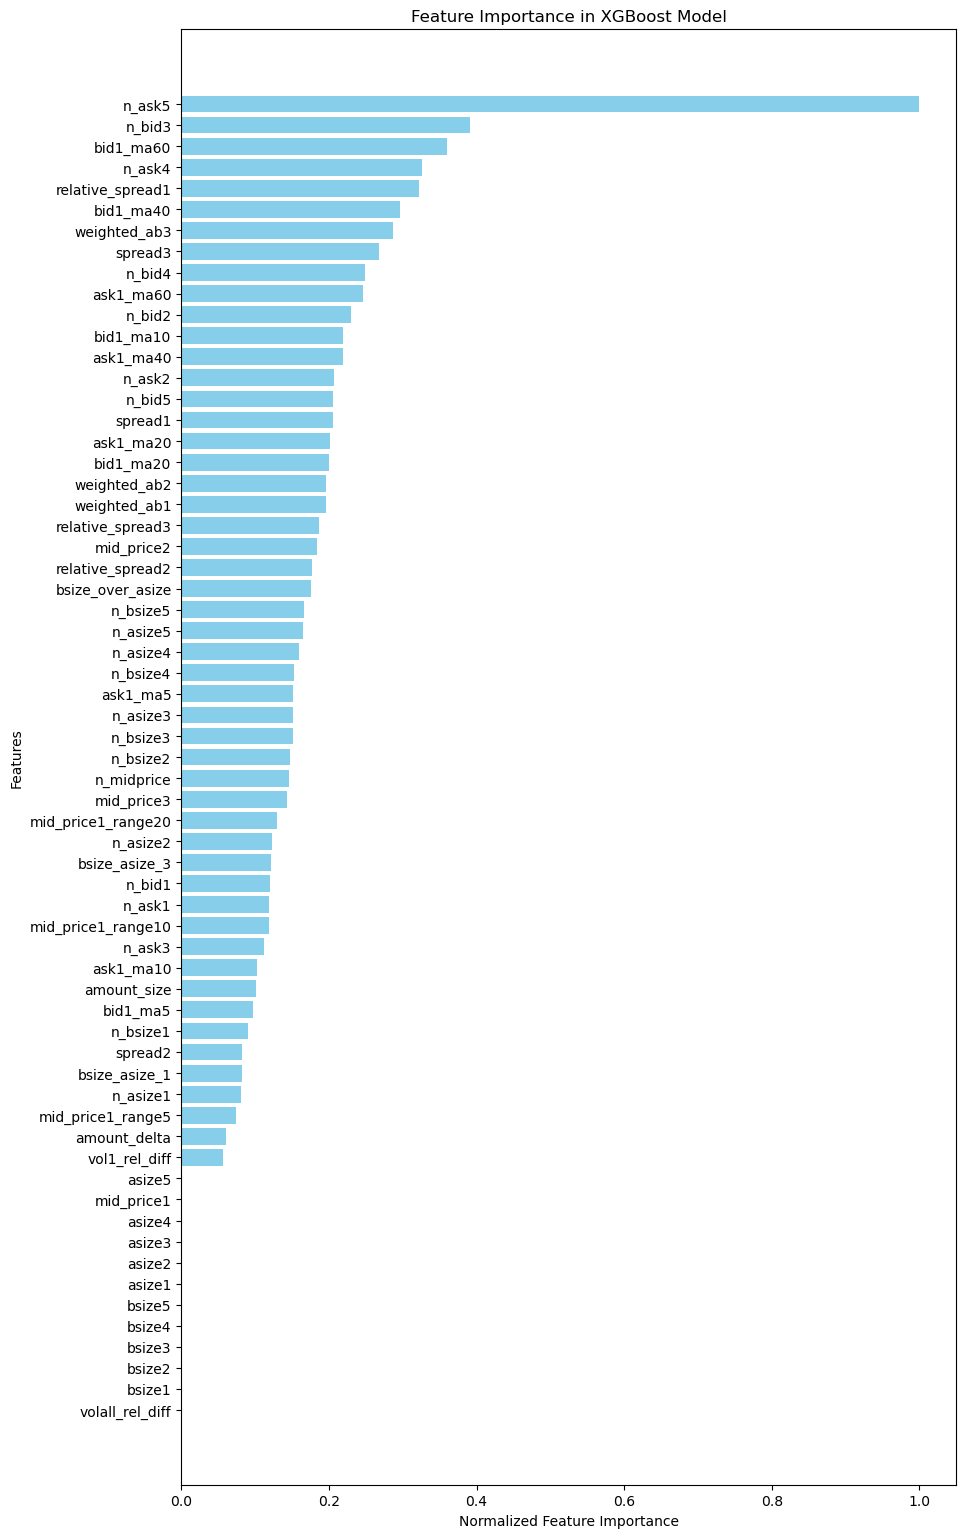

In [153]:
importance = model.feature_importances_  
importance_normalized = importance / np.max(importance)  # 归一化处理  
# 将特征和重要性组合成 DataFrame 并排序  
importance_df = pd.DataFrame({  
    'Feature': feature_col_names,  
    'Importance': importance_normalized  
}).sort_values(by='Importance', ascending=False)  

# 可视化特征重要性（按大小排序）  
# 调整图表高度  
plt.figure(figsize=(10, len(importance_df) * 0.3))  # 根据特征数量动态调整高度  
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')  
plt.xlabel('Normalized Feature Importance')  
plt.ylabel('Features')  
plt.title('Feature Importance in XGBoost Model')  
plt.gca().invert_yaxis()  # 反转 y 轴，使重要性最高的特征在顶部  
plt.show()

In [172]:
feature_col_names = [  
    # 原始特征  
    'n_bid1', 'n_bid2', 'n_bid3', 'n_bid4', 'n_bid5',  
    'n_ask1', 'n_ask2', 'n_ask3', 'n_ask4', 'n_ask5',  
    'n_asize1', 'n_asize2', 'n_asize3', 'n_asize4', 'n_asize5',  
    'n_bsize1', 'n_bsize2', 'n_bsize3', 'n_bsize4', 'n_bsize5',  
    'amount_delta', 'n_midprice',  

    # 对数变换后的报单量  
    'bsize1', 'bsize2', 'bsize3', 'bsize4', 'bsize5',  
    'asize1', 'asize2', 'asize3', 'asize4', 'asize5',  

    # 价格差  
    'spread1', 'spread2', 'spread3',  

    # 中间价  
    'mid_price1', 'mid_price2', 'mid_price3',  

    # 加权平均价格  
    'weighted_ab1', 'weighted_ab2', 'weighted_ab3',  

    # 相对价差  
    'relative_spread1', 'relative_spread2', 'relative_spread3',  

    # 移动平均价格  
    'ask1_ma5', 'ask1_ma10', 'ask1_ma20', 'ask1_ma40', 'ask1_ma60',  
    'bid1_ma5', 'bid1_ma10', 'bid1_ma20', 'bid1_ma40', 'bid1_ma60',  

    # 中间价变化趋势  
    'mid_price1_range5', 'mid_price1_range10', 'mid_price1_range20',  

    # 一档/三档报单量占总报单量比值  
    'bsize_asize_1', 'bsize_asize_3',  

    # 买卖报单量差与交易量结合  
    'bsize_over_asize', 'amount_size',

    'vol1_rel_diff', 'volall_rel_diff'
]
label_col_name = ['label_5']

In [173]:
train_sample_nums = 20000
train_data = np.ascontiguousarray(new_df[feature_col_names][:train_sample_nums].values)
train_label = new_df[label_col_name][:train_sample_nums].values.reshape(-1)

test_data = np.ascontiguousarray(new_df[feature_col_names][train_sample_nums:40000].values)
test_label = new_df[label_col_name][train_sample_nums:40000].values.reshape(-1)

In [176]:
# 设置 XGBClassifier 的参数  
model = XGBClassifier(  
    objective='multi:softmax',  
    num_class=3,  
    learning_rate=0.05,  
    max_depth=3,  
    min_child_weight=1,  
    n_estimators=100,  
    eval_metric='mlogloss',  
    use_label_encoder=False  
)  

# 训练模型  
model.fit(train_data, train_label, verbose=True)  

y_pred = model.predict(test_data) 

# 计算 Precision、Recall、F0.5  
precision = precision_score(test_label, y_pred, average='weighted')  
recall = recall_score(test_label, y_pred, average='weighted')  
f05 = fbeta_score(test_label, y_pred, beta=0.5, average='weighted')  

# 输出结果  
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F0.5: {f05:.4f}")  

# 输出分类报告  
print("\nClassification Report:")  
print(classification_report(test_label, y_pred))  


/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [04:45:32] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precision: 0.8086
Recall: 0.8400
F0.5: 0.7336

Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.01      0.02      1545
         1.0       0.84      1.00      0.91     16796
         2.0       0.80      0.00      0.00      1659

    accuracy                           0.84     20000
   macro avg       0.70      0.34      0.31     20000
weighted avg       0.81      0.84      0.77     20000



In [ ]:
# 计算 sample_weight  
train_label = train_label.astype(int)  
class_counts = np.bincount(train_label)  
sample_weight = np.array([1.0 / class_counts[label] for label in train_label])  

# 设置初始模型  
model = XGBClassifier(  
    objective='multi:softmax',  
    num_class=3,  
    eval_metric='mlogloss',  
    use_label_encoder=False  
)  

# 定义参数网格  
param_grid = {  
    'max_depth': [3, 6, 9],          # 树的最大深度  
    'min_child_weight': [1, 3, 5],  # 分裂条件  
    'learning_rate': [0.05],        # 固定学习率  
    'n_estimators': [100, 300, 500] # 迭代轮数  
}  

# 使用 GridSearchCV 进行网格搜索  
grid_search = GridSearchCV(  
    estimator=model,  
    param_grid=param_grid,  
    scoring='f1_weighted',  # 使用加权 F1 作为评估指标  
    cv=3,                   # 3 折交叉验证  
    verbose=1,  
    n_jobs=-1  
)  

# 训练模型  
grid_search.fit(train_data, train_label, sample_weight=sample_weight)  

# 输出最佳参数  
print("Best Parameters:", grid_search.best_params_)  

# 使用最佳参数训练最终模型  
best_model = grid_search.best_estimator_  
best_model.fit(train_data, train_label, sample_weight=sample_weight)  

# 预测  
y_pred = best_model.predict(test_data)  

# 计算 Precision、Recall、F0.5  
precision = precision_score(test_label, y_pred, average='weighted')  
recall = recall_score(test_label, y_pred, average='weighted')  
f05 = fbeta_score(test_label, y_pred, beta=0.5, average='weighted')  

# 输出结果  
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F0.5: {f05:.4f}")  

# 输出分类报告  
print("\nClassification Report:")  
print(classification_report(test_label, y_pred))  

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [04:43:53] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [04:43:53] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [04:43:53] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lissu/minico

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Precision: 0.0060
Recall: 0.0772
F0.5: 0.0073

Classification Report:
              precision    recall  f1-score   support

         0.0       0.08      1.00      0.14      1545
         1.0       0.00      0.00      0.00     16796
         2.0       0.00      0.00      0.00      1659

    accuracy                           0.08     20000
   macro avg       0.03      0.33      0.05     20000
weighted avg       0.01      0.08      0.01     20000



/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [04:44:06] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lissu/miniconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(re

In [ ]:

# 保存预测结果用于公榜测评  
submission = pd.DataFrame({'TrueLabel': test_label, 'PredictedLabel': y_pred})  
submission.to_csv('submission.csv', index=False)  

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  
model.fit(train_data, train_label)  